In [2]:
!pip install -r requirements.txt

     |████████████████████████████████| 293 kB 1.4 MB/s eta 0:00:01


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/high_diamond_ranked_10min.csv')

In [3]:
diffcols = [c for c in df.columns if 'diff' in c.lower()]
diffcols

['blueGoldDiff', 'blueExperienceDiff', 'redGoldDiff', 'redExperienceDiff']

In [4]:
onlyBlueCols = [c for c in df.columns if 'blue' in c.lower()]
onlyBlueCols

['blueWins',
 'blueWardsPlaced',
 'blueWardsDestroyed',
 'blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueHeralds',
 'blueTowersDestroyed',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueCSPerMin',
 'blueGoldPerMin']

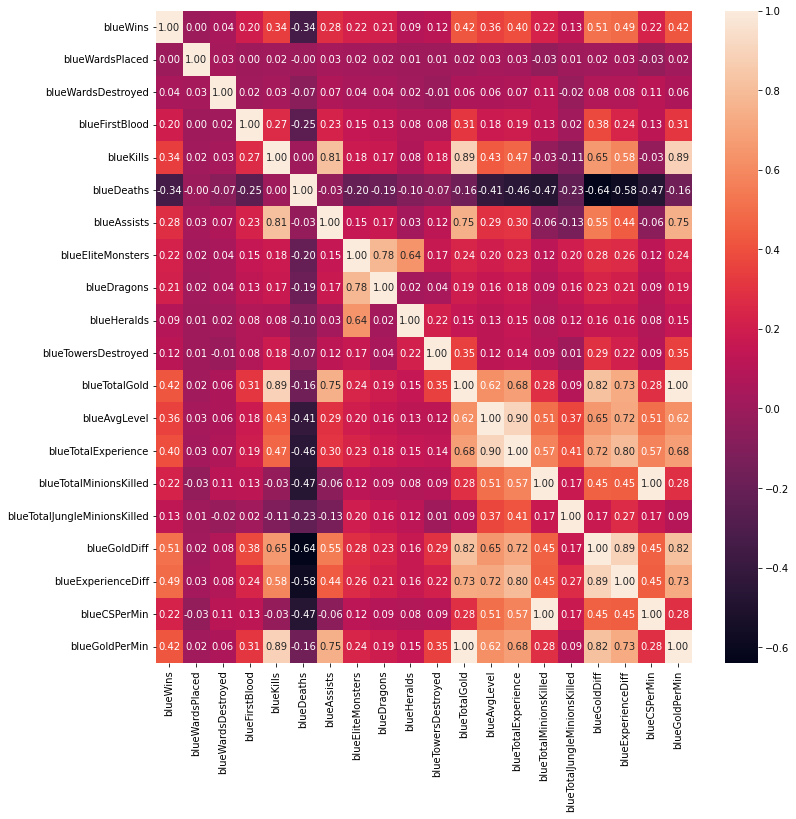

In [5]:
plt.figure(figsize=(12, 12))
sns.heatmap(df[onlyBlueCols].corr(), annot=True, fmt=".2f")
plt.show()

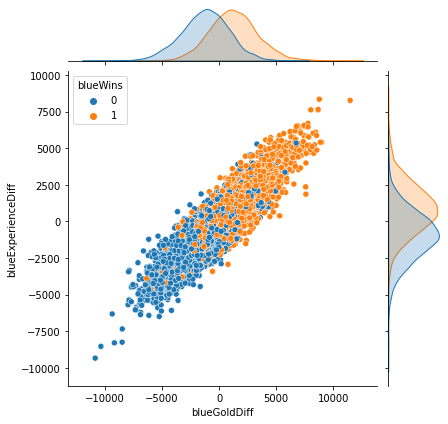

In [6]:
sns.jointplot(data=df, x="blueGoldDiff", y="blueExperienceDiff", hue="blueWins")
plt.show()

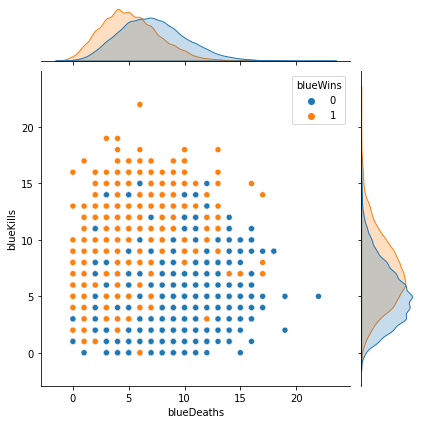

In [7]:
sns.jointplot(data=df, x="blueDeaths", y="blueKills", hue="blueWins")
plt.show()

/tmp/ipykernel_6559/1329549097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["goldDiff"] = df["blueGoldDiff"]
/tmp/ipykernel_6559/1329549097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["expDiff"] = df["blueExperienceDiff"]
/tmp/ipykernel_6559/1329549097.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

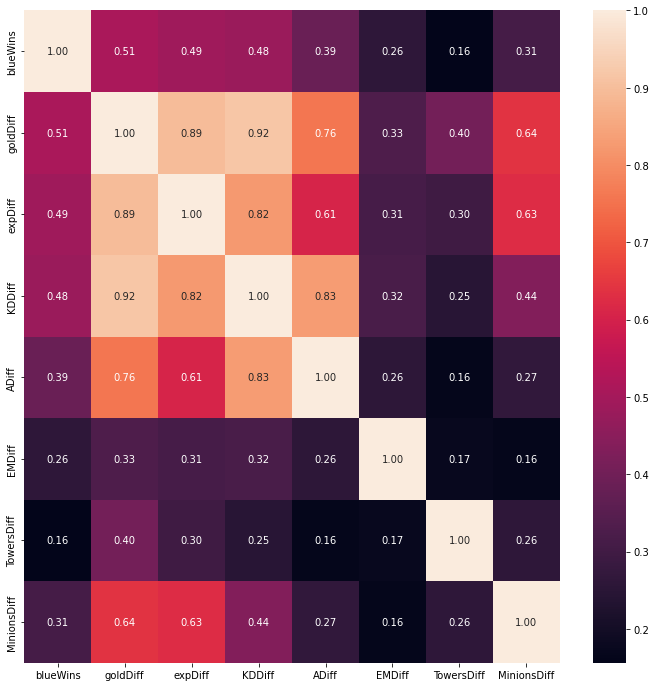

In [8]:
features = df[['blueWins']]

features["goldDiff"] = df["blueGoldDiff"]
features["expDiff"] = df["blueExperienceDiff"]
features["KDDiff"] = df["blueKills"] - df["blueDeaths"]
features["ADiff"] = df["blueAssists"] - df["redAssists"]
features["EMDiff"] = df["blueEliteMonsters"] - df["redEliteMonsters"]
features["TowersDiff"] = df["blueTowersDestroyed"] - df["redTowersDestroyed"]
features["MinionsDiff"] = df["blueTotalMinionsKilled"] - df["redTotalMinionsKilled"]

plt.figure(figsize=(12, 12))
sns.heatmap(features.corr(), annot=True, fmt=".2f")
plt.show()

### Description

League of Legends is a MOBA (multiplayer online battle arena) where 2 teams (blue and red) face off.

The game is about

- killing:

    - enemy players

    - minions

    - monsters in the jungle (some of them are elite: Dragons, Heralds)
    
- destroying buildings of enemy team.


Every kill or structure destruction gives both gold for a player or entire team, and experience for a player such that they can gain bigger level.
Every player gets one kill (K) while finishing enemy, one death (D) while dying (most often from an enemy) and assist (A) while helping teammate with kill.

The ultimate aim of the game is to destroy enemy main building.


In [9]:
features.drop('blueWins', axis=1).values.shape

(9879, 7)

In [10]:
features['blueWins'].values.astype(int).shape

(9879,)

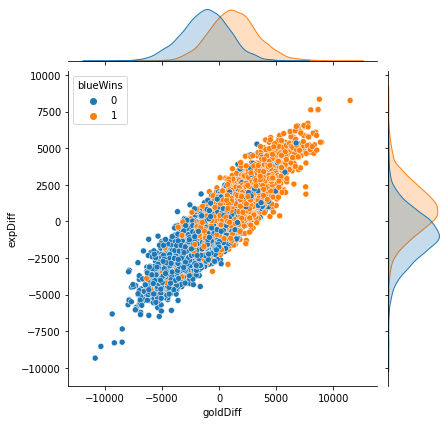

In [11]:
sns.jointplot(data=features, x="goldDiff", y="expDiff", hue="blueWins")
plt.show()

## Prior predictive check for Probit model

In [13]:
from cmdstanpy import CmdStanModel

probit_ppc = CmdStanModel(stan_file='models/probit_ppc.stan')

INFO:cmdstanpy:compiling stan file /home/models/probit_ppc.stan to exe file /home/models/probit_ppc
INFO:cmdstanpy:compiled model executable: /home/models/probit_ppc
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/models/probit_ppc.hpp /home/models/probit_ppc.stan
Warning in '/home/models/probit_ppc.stan', line 18, column 2: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/models/probit_ppc.stan', line 19, column 2: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/models/probit_ppc.stan', line 20, column 2: Declaration of
    arrays by placing brackets a

In [15]:
ppc_data = probit_ppc.sample(data={"N": 1000})

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [18]:
probit_ppc_df = ppc_data.draws_pd()
probit_ppc_df.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_gold,beta_exp,...,expDiff_sim[991],expDiff_sim[992],expDiff_sim[993],expDiff_sim[994],expDiff_sim[995],expDiff_sim[996],expDiff_sim[997],expDiff_sim[998],expDiff_sim[999],expDiff_sim[1000]
0,-1.97477,0.990377,0.486421,3.0,7.0,0.0,5.24533,-1.203410,0.800749,0.584462,...,2252.70,3069.150,4472.840,3039.740,4577.230,-671.926,2183.200,518.399,1385.49,2099.080
1,-2.33849,0.934593,0.486421,2.0,3.0,0.0,3.24729,-1.562820,0.738854,1.210660,...,-5384.01,-3372.180,2063.930,-1420.770,1265.340,1478.400,-338.406,-3553.450,1519.87,1574.910
2,-1.23039,0.975204,0.486421,2.0,7.0,0.0,3.63569,0.501992,1.219720,1.252320,...,2879.36,-2626.810,-4758.310,-394.280,-259.304,1040.290,-968.632,902.123,-1233.44,209.157
3,-2.82311,0.657419,0.486421,3.0,7.0,0.0,4.68818,0.689923,0.534856,0.164848,...,-1290.08,230.169,-3522.630,-4729.620,675.814,4143.470,475.960,-5289.820,4243.64,-3921.610
4,-2.41396,0.989723,0.486421,3.0,7.0,0.0,4.20318,-1.218260,0.766746,0.349496,...,3741.09,-2185.470,418.434,626.605,1216.640,-2377.170,-271.891,-1021.320,-2861.36,-869.240


## Posterior predictive check for Probit model

In [27]:
from cmdstanpy import CmdStanModel

probit_posterior = CmdStanModel(stan_file='models/probit_posterior.stan')

INFO:cmdstanpy:compiling stan file /home/models/probit_posterior.stan to exe file /home/models/probit_posterior
INFO:cmdstanpy:compiled model executable: /home/models/probit_posterior
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/models/probit_posterior.hpp /home/models/probit_posterior.stan
Warning in '/home/models/probit_posterior.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/home/models/probit_posterior.stan', line 4, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/home/models/probit_posterior.stan', line 5, colu

In [30]:
N = 1000

goldDiffNorm = features['goldDiff'].values.astype(int)[:N] / features['goldDiff'].values.std()
expDiffNorm = features['expDiff'].values.astype(int)[:N] / features['expDiff'].values.std()

data = {
    'N': N,
    'gameWon': features['blueWins'].values.astype(int)[:N],
    'goldDiff': goldDiffNorm,
    'expDiff': expDiffNorm
}

fit = probit_posterior.sample(data=data, iter_warmup=1000, iter_sampling=1000, seed=28062023)

print(fit.summary())


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



                      Mean    MCSE  StdDev       5%     50%      95%   N_Eff  \
name                                                                           
lp__              -520.000  0.0400   1.300 -530.000 -520.00 -520.000  1100.0   
alpha               -0.021  0.0011   0.046   -0.098   -0.02    0.056  1800.0   
beta_gold            0.760  0.0026   0.100    0.590    0.76    0.920  1500.0   
beta_exp             0.200  0.0025   0.095    0.048    0.19    0.360  1500.0   
gameWon_rep[1]       0.570  0.0079   0.500    0.000    1.00    1.000  3962.0   
...                    ...     ...     ...      ...     ...      ...     ...   
gameWon_rep[996]     0.008  0.0014   0.089    0.000    0.00    0.000  4067.0   
gameWon_rep[997]     0.190  0.0061   0.390    0.000    0.00    1.000  4138.0   
gameWon_rep[998]     0.620  0.0078   0.480    0.000    1.00    1.000  3838.0   
gameWon_rep[999]     0.410  0.0077   0.490    0.000    0.00    1.000  4062.0   
gameWon_rep[1000]    0.230  0.0068   0.

In [31]:
probit_posterior_df = fit.draws_pd()

In [33]:
alpha = probit_posterior_df.alpha.mean()
beta1 = probit_posterior_df.beta_gold.mean()
beta2 = probit_posterior_df.beta_exp.mean()
alpha, beta1, beta2

(-0.021193468710075002, 0.76034414325, 0.19705940861749996)

In [39]:
test_df = features.iloc[N:N+100]
test_df.goldDiff = test_df.goldDiff / test_df.goldDiff.std()
test_df.expDiff = test_df.expDiff / test_df.expDiff.std()
len(test_df)

/tmp/ipykernel_6559/1400126735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.goldDiff = test_df.goldDiff / test_df.goldDiff.std()
/tmp/ipykernel_6559/1400126735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.expDiff = test_df.expDiff / test_df.expDiff.std()


100

In [40]:
lin_comb = alpha + beta1 * test_df.goldDiff.values + beta2 * test_df.expDiff.values

In [41]:
from scipy.stats import norm
probability = norm.cdf(lin_comb)
pred = [1 if p > 0.5 else 0 for p in probability]

In [42]:
from sklearn.metrics import accuracy_score

accuracy_score(test_df.blueWins.values, pred)

0.63

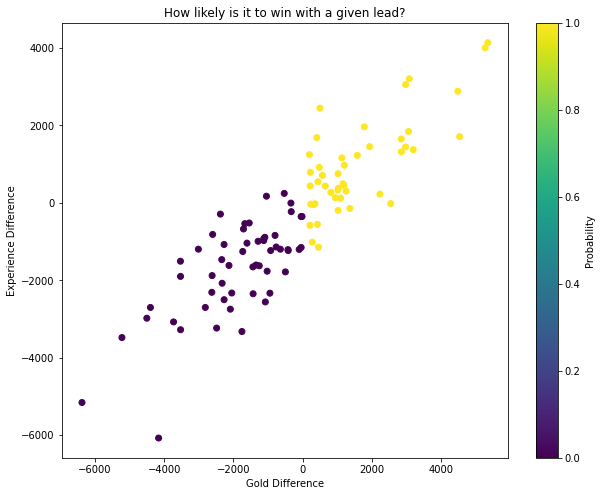

In [38]:
plt.figure(figsize=(10, 8))
plt.scatter(test_df.goldDiff.values, test_df.expDiff.values, c=probability, cmap='viridis')
plt.colorbar(label='Probability')
plt.xlabel('Gold Difference')
plt.ylabel('Experience Difference')
plt.title('How likely is it to win with a given lead?')
plt.show()